# Préparation du NoteBook (correspond à l'étape 5) :

1. Importation des librairies nécessaires
2. Chargements de la data avec les fichiers .csv obtenus avec le code .py

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os




data_tous_les_cve_path = os.getcwd() 
data_tous_les_cve_path = os.path.join(data_tous_les_cve_path, 'tous_les_cve.csv')

if os.path.exists(data_tous_les_cve_path):
    print(f"Fichier CSV trouvé")
    

    try:
        data_tous_les_cve = pd.read_csv(data_tous_les_cve_path)
        print(f"Fichier chargé avec succès.")
    except Exception as e:
        print(f"Erreur lors du chargement du CSV : {e}")
else:
    print(f"Fichier CSV introuvable : {data_tous_les_cve_path}")


Fichier CSV trouvé
Fichier chargé avec succès.


# Affichage de la répartition  des CVE par gravité, un diagramme circulaire 

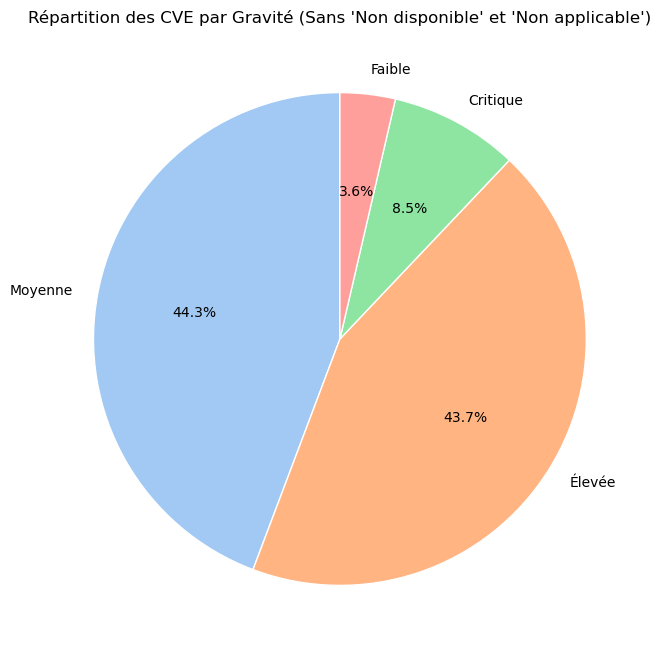

In [11]:

data_filtre = data_tous_les_cve[
    data_tous_les_cve["Base Severity"].isin(["Critique", "Élevée","Moyenne", "Faible"])
]

# Compter le nombre de CVE par gravite
gravite_counts = data_filtre["Base Severity"].value_counts()

# creer un camembert
plt.figure(figsize=(10, 8))
colors = sns.color_palette("pastel")[0:len(gravite_counts)]
plt.pie(
    gravite_counts, 
    labels=gravite_counts.index, 
    autopct="%1.1f%%", 
    startangle=90, 
    colors=colors,
    wedgeprops={"edgecolor": "white"}
)
plt.title("Répartition des CVE par Gravité (Sans 'Non disponible' et 'Non applicable')")
plt.show()


# Affichage des :
1. Produits les plus impactés mentionnés au moins 10 fois
2. Vendeurs les plus impactés

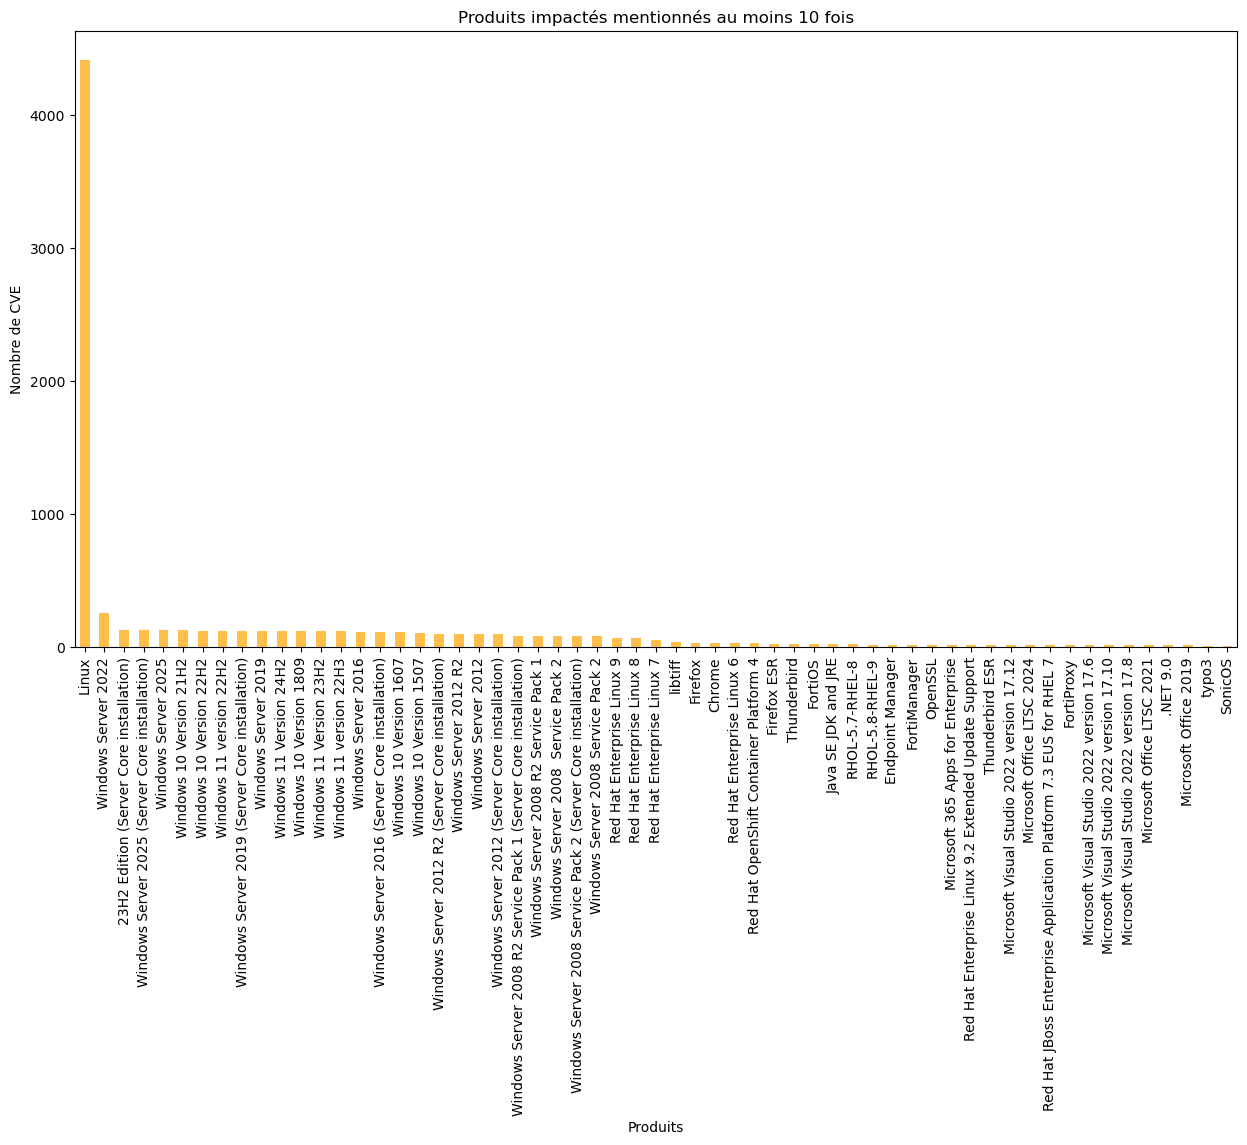

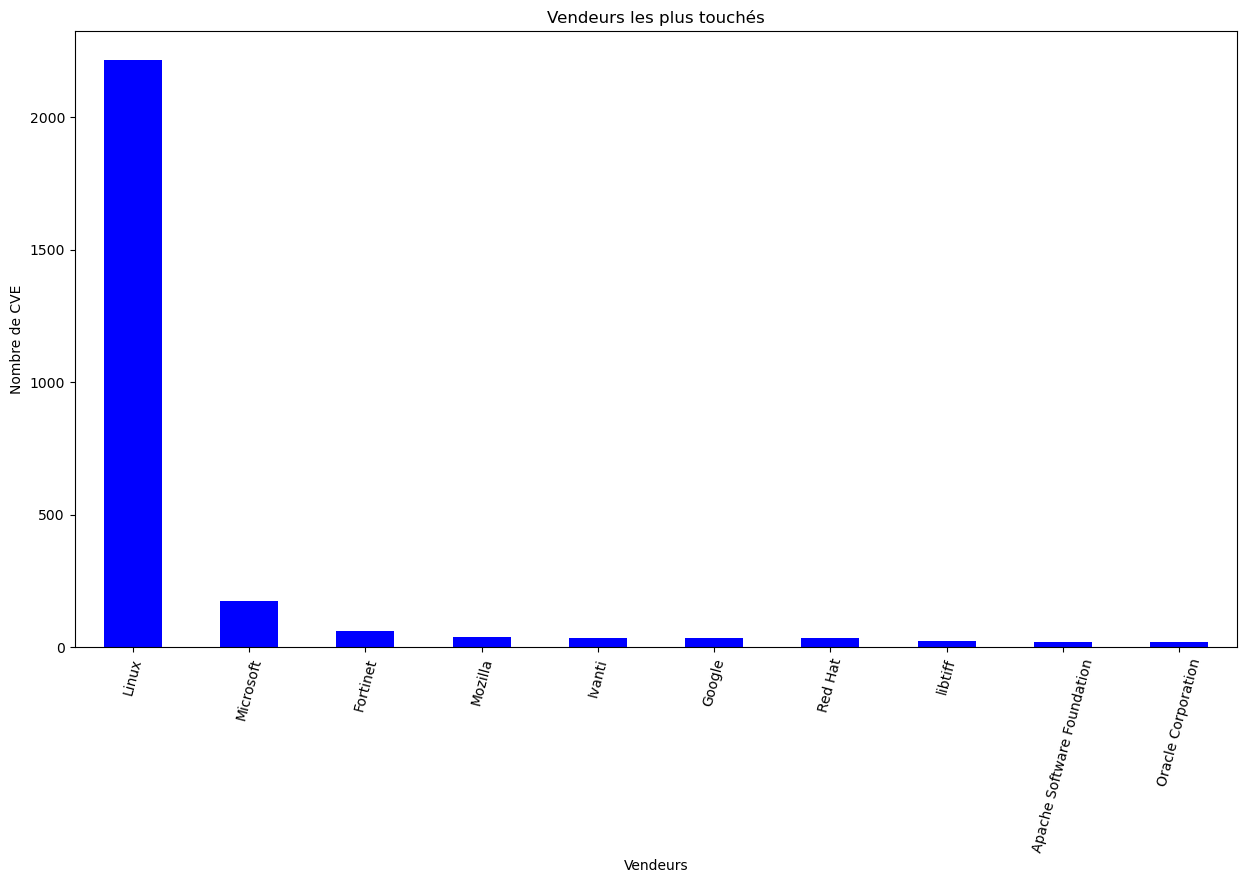

In [12]:

data_tous_les_cve = pd.read_csv("tous_les_cve.csv")

data_tous_les_cve["Produits Affectés"] = data_tous_les_cve["Produits Affectés"].fillna("Non disponible")
data_tous_les_cve["Vendeur"] = data_tous_les_cve["Vendeur"].fillna("Non disponible")


data_produits_valides = data_tous_les_cve[
    ~data_tous_les_cve["Produits Affectés"].isin(["Non disponible", "Non applicable"])
]
tous_les_produits = []
for chaine_produits in data_produits_valides["Produits Affectés"]:
    chaine_produits = chaine_produits.split(",")  
    for element_produit in chaine_produits:
        element_produit = element_produit.strip()
        if element_produit and element_produit != "Non disponible":  
            tous_les_produits.append(element_produit)


count_produits = pd.Series(tous_les_produits).value_counts()


count_produits_filtres = count_produits[count_produits >= 10]


plt.figure(figsize=(15, 8))
count_produits_filtres.plot(kind="bar", color="orange", alpha=0.7)
plt.title("Produits impactés mentionnés au moins 10 fois")
plt.xlabel("Produits")
plt.ylabel("Nombre de CVE")
plt.xticks(rotation=90)
plt.show()


data_vendeurs_valides = data_tous_les_cve[
    ~data_tous_les_cve["Vendeur"].isin(["Non disponible", "Non applicable"])
]


vendeurs = []
for vendeurs_chaine in data_vendeurs_valides["Vendeur"]:
    vendeurs_chaine = vendeurs_chaine.split(",")  
    for vendeur in vendeurs_chaine:
        vendeur = vendeur.strip()
        if vendeur and vendeur != "Non disponible":  
            vendeurs.append(vendeur)

vendeurs_counts = pd.Series(vendeurs).value_counts()

plt.figure(figsize=(15, 8))
vendeurs_counts.head(10).plot(kind="bar", color="blue")
plt.title("Vendeurs les plus touchés")
plt.xlabel("Vendeurs")
plt.ylabel("Nombre de CVE")
plt.xticks(rotation=75)
plt.show()


On voit que Linux est beaucoup plus touchés que les autres vendeurs. Cela parrait logique étant donné que l'OS Linux est fait pour les personnes qui ont une certaine expérience dans le domaine.


# Affichage des vendeurs ayant le plus de produits impactés

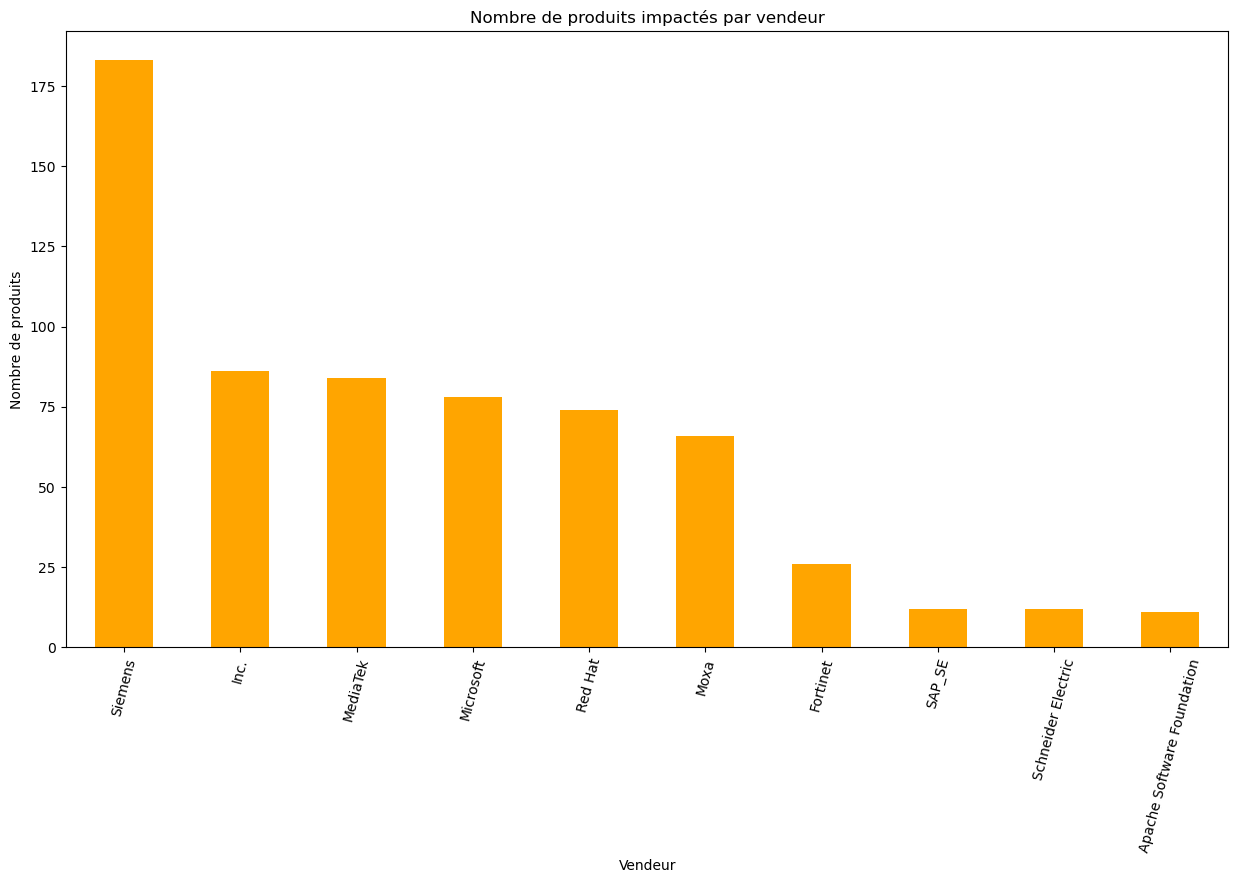

In [13]:

associations = []
for _, row in data_tous_les_cve.iterrows():

    vendeurs = [v.strip() for v in row["Vendeur"].split(",") if v.strip() and v.strip().lower() not in ["non disponible", "n/a"]]
    produits = [p.strip() for p in row["Produits Affectés"].split(",") if p.strip() and p.strip().lower() not in ["non disponible", "n/a"]]
    
    for vendeur in vendeurs:
        for produit in produits:
            associations.append({"Vendeur": vendeur, "Produit": produit})

df_associations = pd.DataFrame(associations)

produits_par_vendeur = df_associations.groupby("Vendeur")["Produit"].nunique().sort_values(ascending=False)

plt.figure(figsize=(15, 8))
produits_par_vendeur.head(10).plot(kind="bar", color="orange")
plt.title("Nombre de produits impactés par vendeur")
plt.xlabel("Vendeur")
plt.ylabel("Nombre de produits")
plt.xticks(rotation=75)
plt.show()


Il est interresant de comparer l'affichage des produits et vendeurs les plus touchés avec celui des nombres de produits les plus impactés. On voit que Linux présente le plus de CVE sur des failles de sécurité. Par contre, on constate que Microsoft par exemple possède beaucoup plus de produits touchés que Linux. On peut conclure que, certes Linux possède le plus de CVE, mais seulement sur quelques produits tandis que Microsoft en présente moins mais sur beaucoup plus de produits. 

Affichage : 
1. Vendeurs ayant la moyenne de score CVSS la plus élevée
2. Vendeurs ayant la moyenne de score CVSS la plus faible


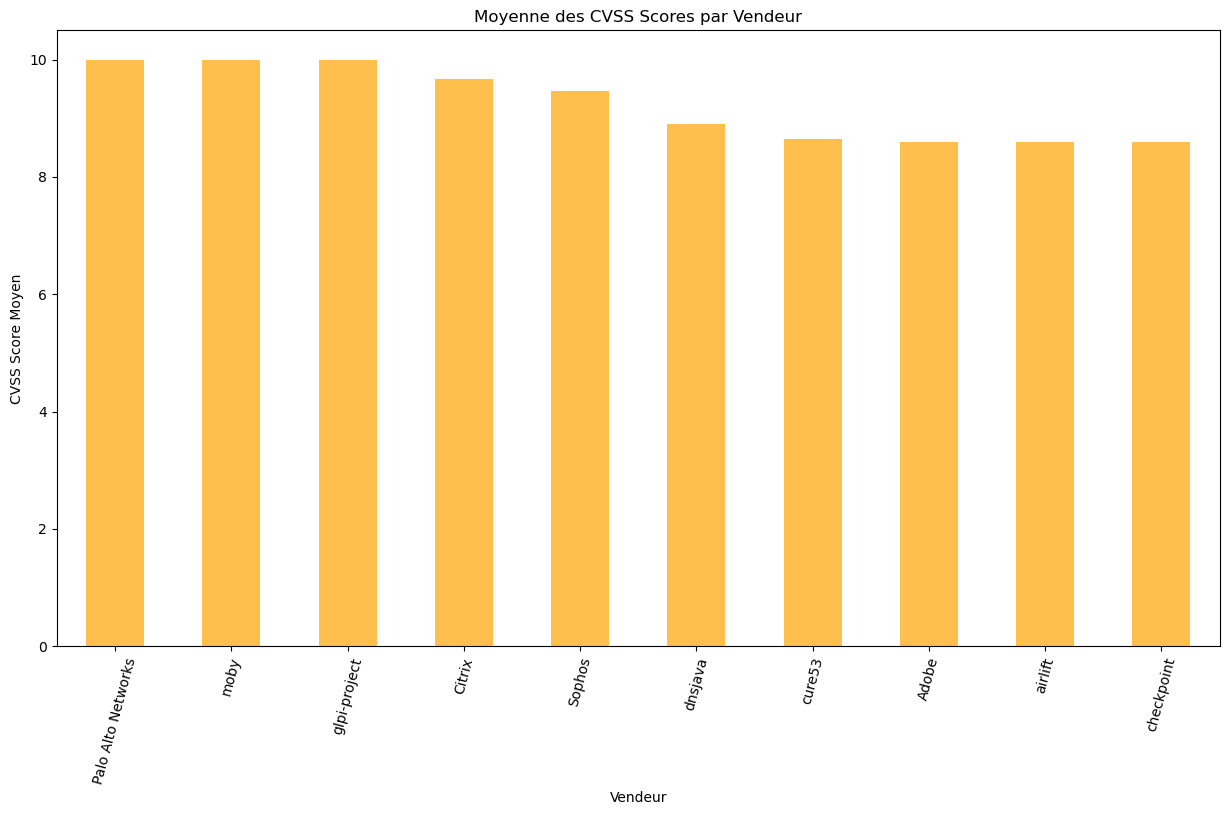

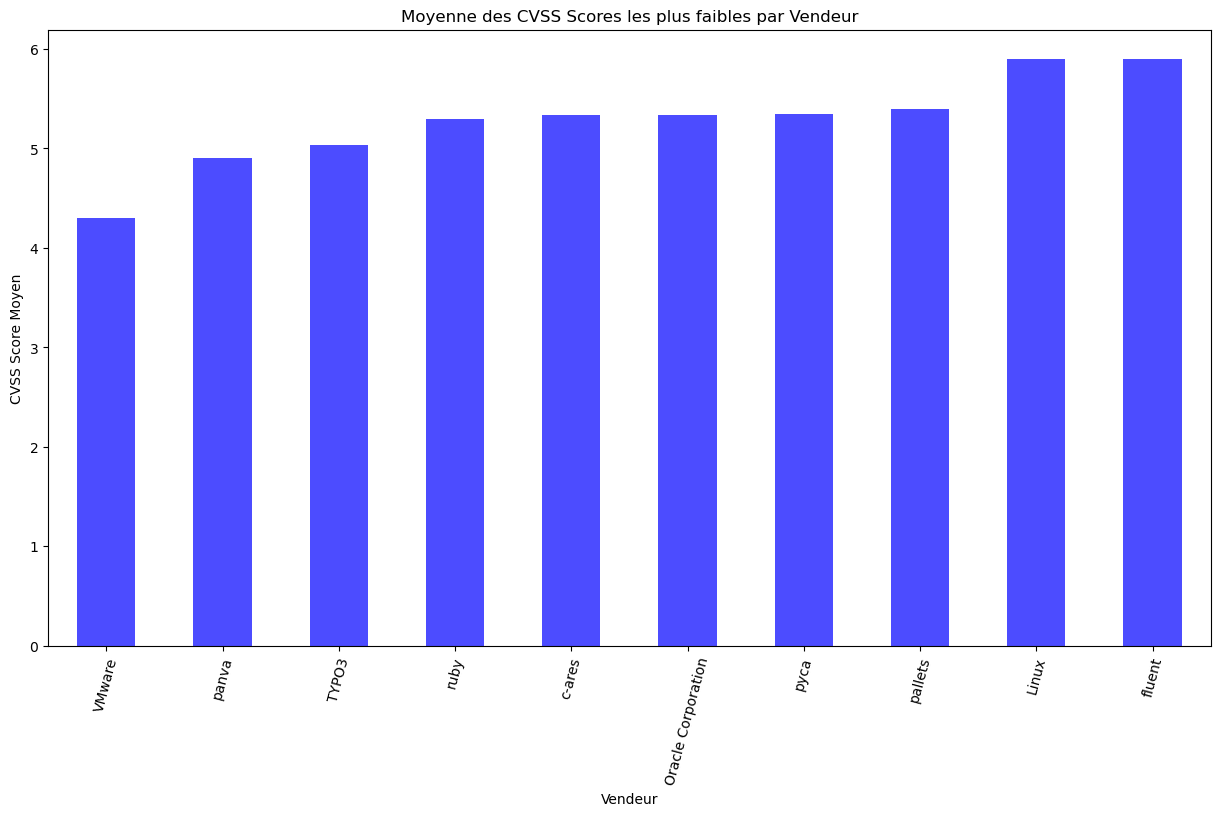

In [14]:

data_tous_les_cve_filtre = data_tous_les_cve[
    (data_tous_les_cve["Vendeur"] != "Non disponible") & 
    (data_tous_les_cve["CVSS Score"] != "Non disponible")
].copy()  

data_tous_les_cve_filtre["CVSS Score"] = pd.to_numeric(data_tous_les_cve_filtre["CVSS Score"], errors="coerce")

moyenne_cvss_par_vendeur = (
    data_tous_les_cve_filtre.groupby("Vendeur")["CVSS Score"]
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(15, 8))
moyenne_cvss_par_vendeur.head(10).plot(kind="bar", color="orange", alpha=0.7)
plt.title("Moyenne des CVSS Scores par Vendeur")
plt.xlabel("Vendeur")
plt.ylabel("CVSS Score Moyen")
plt.xticks(rotation=75)
plt.show()
data_tous_les_cve_filtre["CVSS Score"] = pd.to_numeric(data_tous_les_cve_filtre["CVSS Score"], errors="coerce")

moyenne_cvss_par_vendeur = (
    data_tous_les_cve_filtre.groupby("Vendeur")["CVSS Score"]
    .mean()
    .sort_values(ascending=True) 
)

plt.figure(figsize=(15, 8))
moyenne_cvss_par_vendeur.head(10).plot(kind="bar", color="blue", alpha=0.7)
plt.title("Moyenne des CVSS Scores les plus faibles par Vendeur")
plt.xlabel("Vendeur")
plt.ylabel("CVSS Score Moyen")
plt.xticks(rotation=75)
plt.show()


# Affichage d'une HeatMap qui permet de voir la répartion des CVE par gravité en fonction du vendeur 

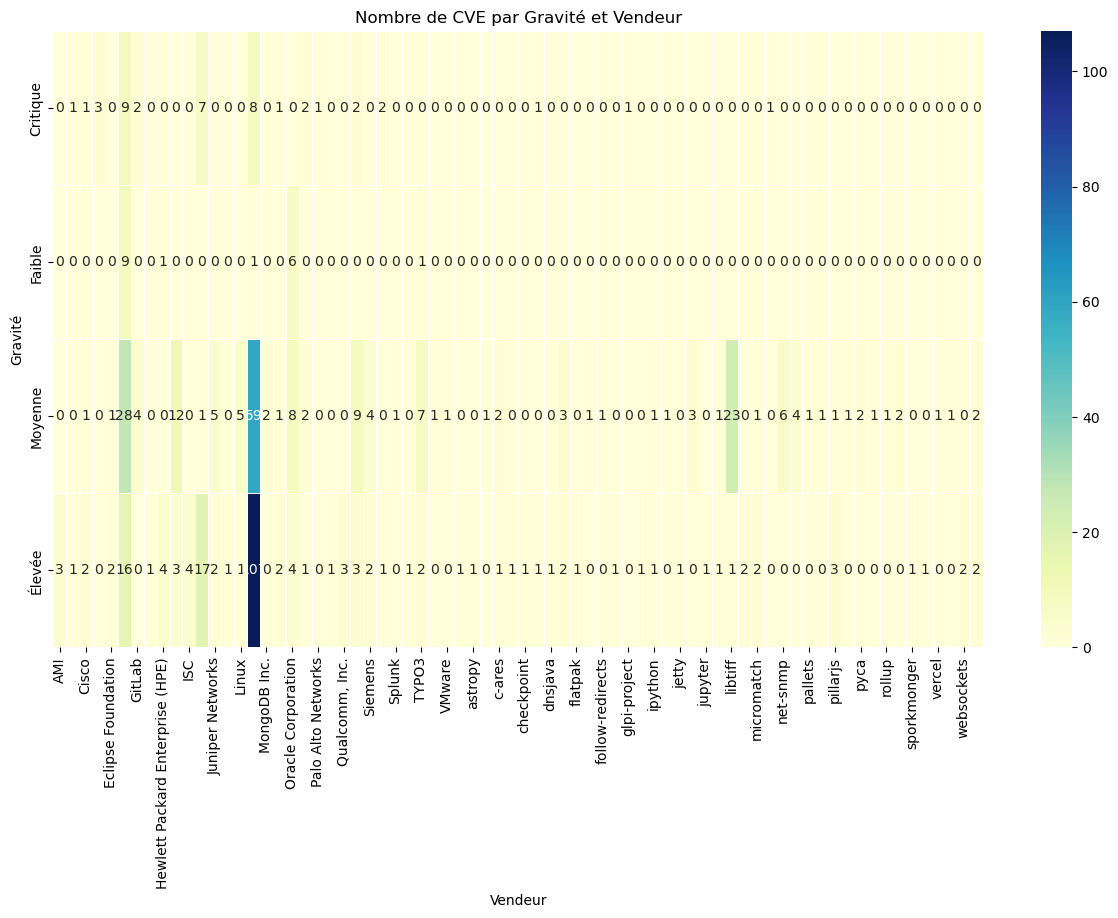

In [15]:

data_tous_les_cve_filtre = data_tous_les_cve[
    ~data_tous_les_cve["Base Severity"].isin(["Non disponible", "Non applicable"]) &
    ~data_tous_les_cve["Vendeur"].isin(["Non disponible", "Non applicable"])
]

heatmap_data = pd.crosstab(data_tous_les_cve_filtre["Base Severity"], data_tous_les_cve_filtre["Vendeur"])


plt.figure(figsize=(15, 8))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu", linewidths=0.5)
plt.title("Nombre de CVE par Gravité et Vendeur")
plt.xlabel("Vendeur")
plt.ylabel("Gravité")
plt.xticks(rotation=90)
plt.show()


# Affichage d'un BloxPlot pour montrer la dispersion des CVSS pour les vendeurs les plus touchés


/var/folders/cw/870trxmx4v91qjxj6py3hjzw0000gn/T/ipykernel_90306/938843466.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtre["CVSS Score"] = pd.to_numeric(data_filtre["CVSS Score"], errors="coerce")
/var/folders/cw/870trxmx4v91qjxj6py3hjzw0000gn/T/ipykernel_90306/938843466.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


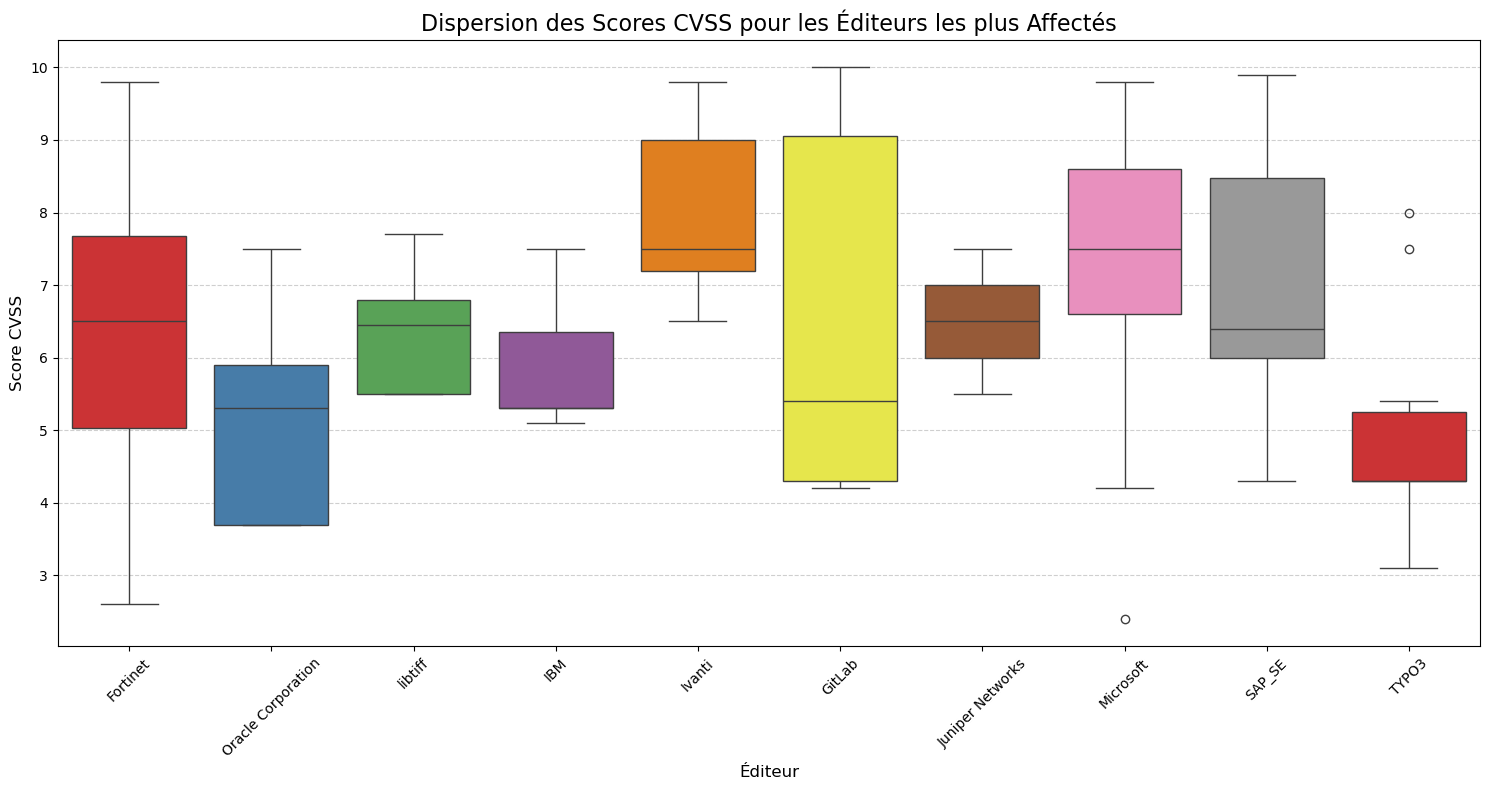

In [16]:

data_filtre = data_tous_les_cve[
    ~data_tous_les_cve["CVSS Score"].isin(["Non disponible", "Non applicable"]) &
    ~data_tous_les_cve["Vendeur"].isin(["Non disponible", "Non applicable"])
]

data_filtre["CVSS Score"] = pd.to_numeric(data_filtre["CVSS Score"], errors="coerce")

vendeur_counts = data_filtre["Vendeur"].value_counts()

top_vendeurs = vendeur_counts.head(10).index
data_top_vendeurs = data_filtre[data_filtre["Vendeur"].isin(top_vendeurs)]

plt.figure(figsize=(15, 8))
sns.boxplot(
    data=data_top_vendeurs,
    x="Vendeur",
    y="CVSS Score",
    palette="Set1"
)

plt.title("Dispersion des Scores CVSS pour les Éditeurs les plus Affectés", fontsize=16)
plt.xlabel("Éditeur", fontsize=12)
plt.ylabel("Score CVSS", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Afficher le graphique
plt.tight_layout()
plt.show()


# Affichage de la gravité des CVE par vendeurs

/var/folders/cw/870trxmx4v91qjxj6py3hjzw0000gn/T/ipykernel_90306/2076585998.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtre["Vendeur"] = data_filtre["Vendeur"].fillna("").astype(str)
/var/folders/cw/870trxmx4v91qjxj6py3hjzw0000gn/T/ipykernel_90306/2076585998.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtre["Produits Affectés"] = data_filtre["Produits Affectés"].fillna("").astype(str)


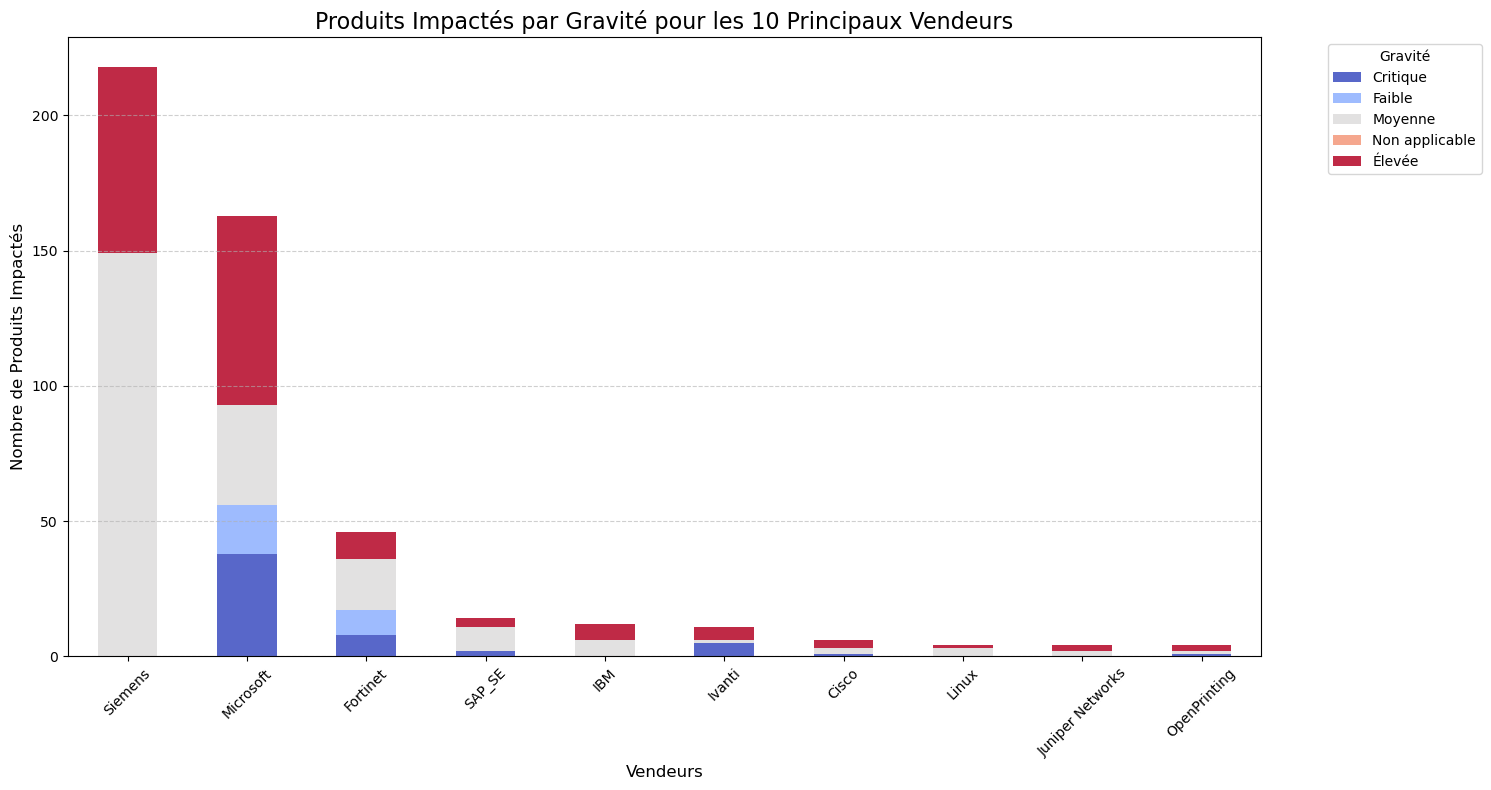

In [17]:

data_filtre = data_tous_les_cve[
    (data_tous_les_cve["Base Severity"] != "Non disponible") &
    (data_tous_les_cve["Vendeur"] != "Non disponible") &
    (data_tous_les_cve["Produits Affectés"] != "Non disponible")
]


data_filtre["Vendeur"] = data_filtre["Vendeur"].fillna("").astype(str)
data_filtre["Produits Affectés"] = data_filtre["Produits Affectés"].fillna("").astype(str)


associations = []
for _, row in data_filtre.iterrows():
    vendeurs = row["Vendeur"].split(",")
    produits = row["Produits Affectés"].split(",")
    for vendeur in vendeurs:
        vendeur = vendeur.strip()
        for produit in produits:
            produit = produit.strip()
            if vendeur and produit: 
                associations.append({"Vendeur": vendeur, "Produit": produit, "Gravité": row["Base Severity"]})


df_associations = pd.DataFrame(associations)


produits_par_vendeur_gravite = (
    df_associations.groupby(["Vendeur", "Gravité"])["Produit"]
    .nunique()
    .reset_index()
    .pivot(index="Vendeur", columns="Gravité", values="Produit")
    .fillna(0)
)


produits_par_vendeur_gravite["Total"] = produits_par_vendeur_gravite.sum(axis=1)
produits_par_vendeur_gravite = produits_par_vendeur_gravite.sort_values(by="Total", ascending=False).drop(columns=["Total"])


produits_par_vendeur_gravite.head(10).plot(
    kind="bar",
    stacked=True,
    figsize=(15, 8),
    cmap="coolwarm",
    alpha=0.85
)


plt.title("Produits Impactés par Gravité pour les 10 Principaux Vendeurs", fontsize=16)
plt.xlabel("Vendeurs", fontsize=12)
plt.ylabel("Nombre de Produits Impactés", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title="Gravité", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Afficher le graphique
plt.tight_layout()
plt.show()


On remarque Microsoft a beaucoup de produits qui font l'objet d'une faille de sécurité, et qu'elles sont tous sauf faibles. Si on regard Linux, (qui possède peu de produits impactés, mais chaque produit fait l'objet d'énormément de soucis) les menances sont majoritairement faible.

# Répartition des CVSS Scores

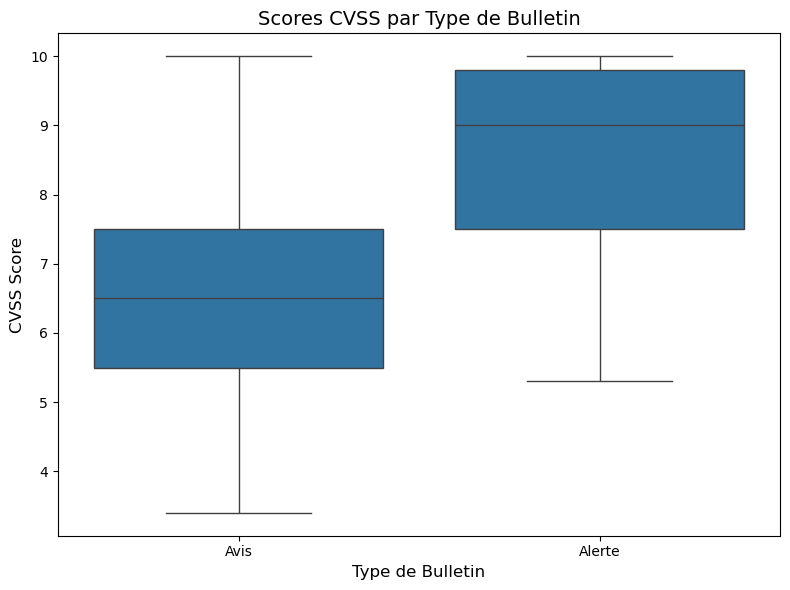

In [101]:

plt.figure(figsize=(8, 6))
sns.boxplot(data=data_cvss_filtre, x='Type', y='CVSS Score') # type: ignore


plt.title('Scores CVSS par Type de Bulletin', fontsize=14)
plt.xlabel('Type de Bulletin', fontsize=12)
plt.ylabel('CVSS Score', fontsize=12)




plt.tight_layout()
plt.show()


# Répartition des Types de Bulletins (Avis/Alerte)

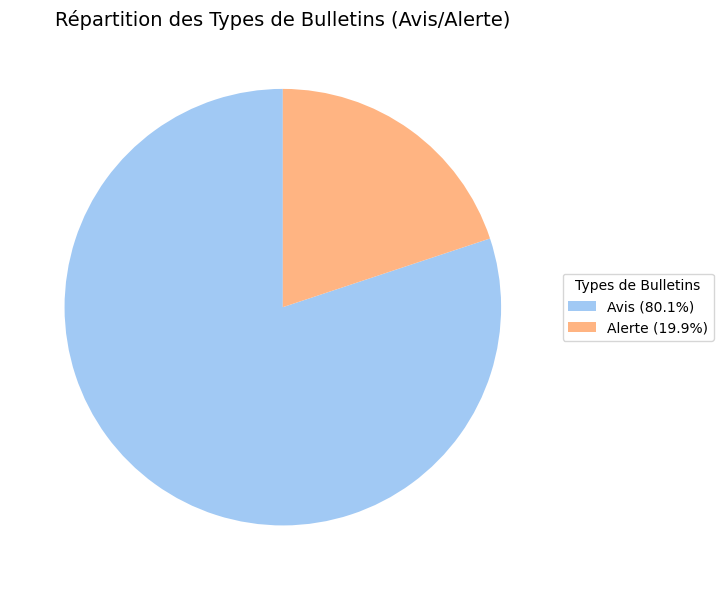

In [86]:

bulletin_counts = data_tous_les_cve_filtre['Type'].value_counts()


plt.figure(figsize=(8, 6))
wedges, texts = plt.pie(
    bulletin_counts, 
    startangle=90, 
    colors=sns.color_palette("pastel")
)

labels = [f"{label} ({percentage:.1f}%)" for label, percentage in zip(bulletin_counts.index, 100 * bulletin_counts / bulletin_counts.sum())]
plt.legend(wedges, labels, title="Types de Bulletins", loc="center left", bbox_to_anchor=(1, 0.5))

plt.title('Répartition des Types de Bulletins (Avis/Alerte)', fontsize=14)
plt.tight_layout()
plt.show()


- Interprétation et analyse du graphique :

Le diagramme en secteurs montre la répartition des types de bulletins (par exemple, "Avis" et "Alerte") présents dans les données fournies. Voici une analyse :

- Proportion des types :

La catégorie dominante est "Avis", occupant une part significative du graphique.
La catégorie "Alerte", si présente, semble représenter une part minime ou est absente.

- Concentration sur un type :

La forte dominance d'une catégorie (comme "Avis") peut indiquer que la source des données (par exemple, ANSSI) émet majoritairement ce type de bulletin.
Si une catégorie comme "Alerte" est peu représentée, cela pourrait suggérer qu'il s'agit d'événements moins fréquents ou plus critiques, nécessitant des conditions spécifiques pour être émis.

- Conclusion :

La répartition montre un déséquilibre marqué entre les types de bulletins, suggérant que l'accent est mis principalement sur les "Avis", ce qui pourrait refléter une stratégie proactive de communication pour sensibiliser à des vulnérabilités ou problèmes généraux.
Si les "Alertes" étaient présentes mais rares, elles pourraient refléter des incidents plus graves et urgents, nécessitant une communication ciblée.

# Distribution Des Scores CVSS Par Vendeur

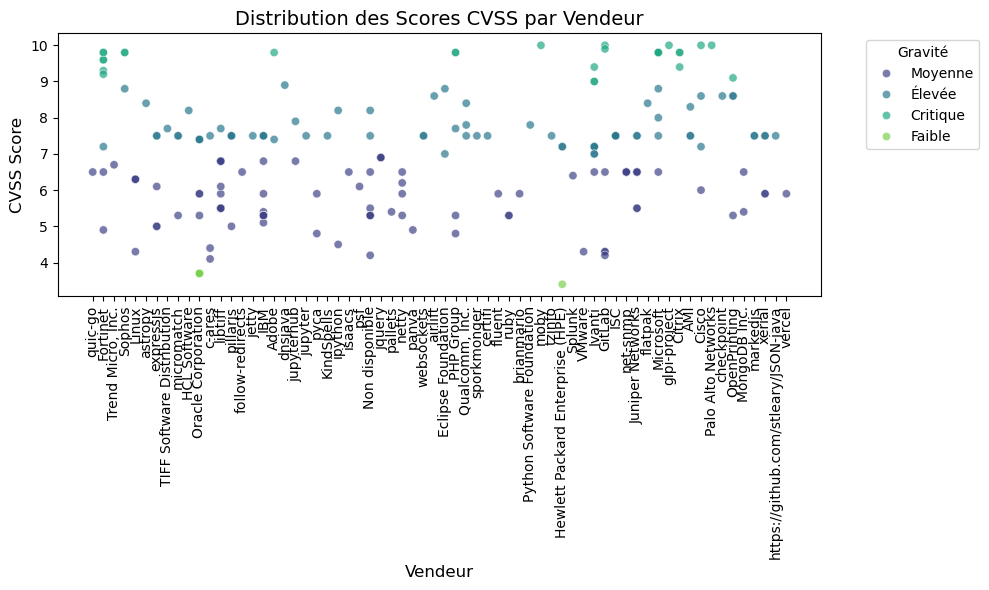

In [ ]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_cvss_filtre, x='Vendeur', y='CVSS Score', hue='Base Severity', alpha=0.7, palette='viridis')# type: ignore
plt.title('Distribution des Scores CVSS par Vendeur', fontsize=14)
plt.xlabel('Vendeur', fontsize=12)
plt.ylabel('CVSS Score', fontsize=12)
plt.xticks(rotation=90)
plt.legend(title='Gravité', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Évolution Du Nombre De Vulnérabilités (Novembre 2024 À 2025)

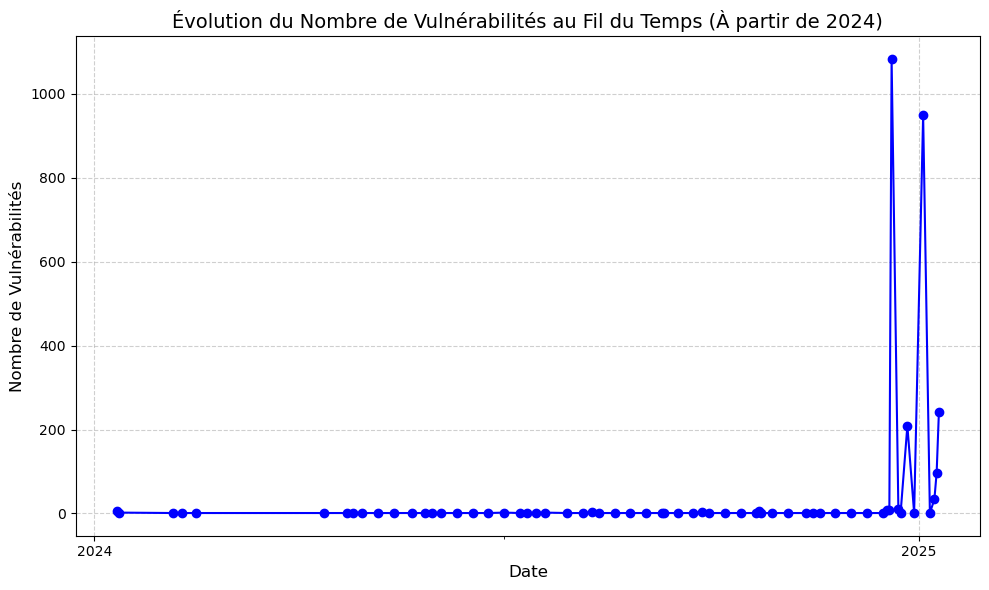

In [91]:
import matplotlib.dates as mdates


data_tous_les_cve['Date'] = pd.to_datetime(data_tous_les_cve['Date'], errors='coerce')

data_tous_les_cve_filtre = data_tous_les_cve[data_tous_les_cve['Date'] >= '2024-01-01']


vulns_by_date = data_tous_les_cve_filtre.groupby(data_tous_les_cve_filtre['Date'].dt.date).size()


plt.figure(figsize=(10, 6))
vulns_by_date.plot(color='blue', marker='o', linestyle='-')  


plt.gca().xaxis.set_major_locator(mdates.YearLocator())  
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator(bymonth=(1, 7)))  
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  


plt.title("Évolution du Nombre de Vulnérabilités au Fil du Temps (À partir de 2024)", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Nombre de Vulnérabilités", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


On remarque que mise à part quelques CVE courant 2022 et 2023, la majorité sont en 2024, et plus précisément fin 2024. Ceci est certainement du au fait que le feed RSS ne conserve pas les évenements trop ancien, et que les faibles occurences en 2022 et 2023 proviennent du feed RSS des bulletins d'actualités. 


# Distribution Des Vulnérabilités Par Gravité

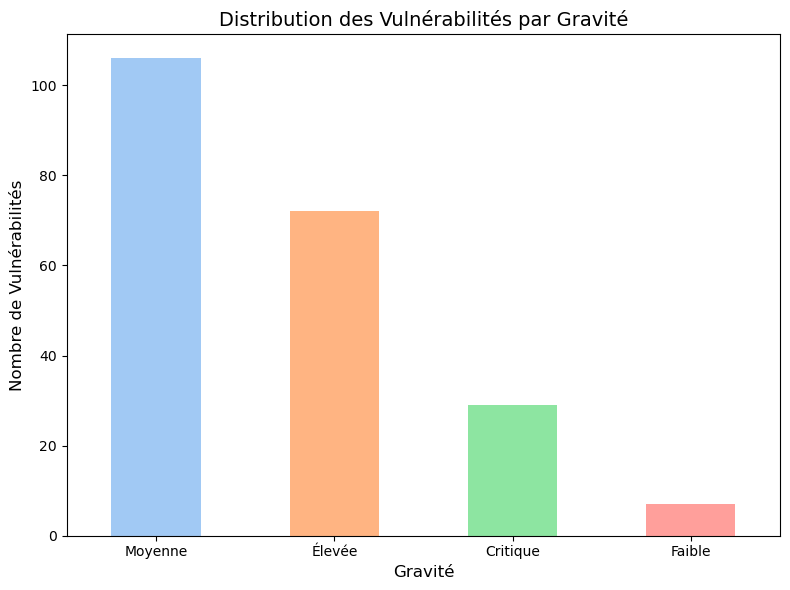

  Base Severity  Nombre de Vulnérabilités
0       Moyenne                       106
1        Élevée                        72
2      Critique                        29
3        Faible                         7


In [104]:

data_filtre = data_tous_les_cve[
    ~data_tous_les_cve['Base Severity'].isin(["Non applicable", "Non disponible"])
]


severity_distribution = data_filtre['Base Severity'].value_counts()


plt.figure(figsize=(8, 6))
severity_distribution.plot(kind='bar', color=sns.color_palette("pastel"))
plt.title('Distribution des Vulnérabilités par Gravité', fontsize=14)
plt.xlabel('Gravité', fontsize=12)
plt.ylabel('Nombre de Vulnérabilités', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


tableau_severity = severity_distribution.reset_index(name='Nombre de Vulnérabilités').rename(columns={'index': 'Gravité'})
print(tableau_severity)


Analyse du graphique et des données :

Parmi les vulnérabilités renseignées, la gravité Moyenne est la plus fréquente, suivie de la gravité Élevée et Critique.
Les vulnérabilités de gravité Faible sont rares.

- Données manquantes ou non applicables :

Les catégories "Non disponible" et "Non applicable" regroupent un grand nombre de données, ce qui peut biaiser l'analyse. Nous les avons donc retirées de l'affichage.
